In [97]:
import torch
from autograph.lib.mcts_aut import AutStats, UCBAnnealedAutStats
from autograph.lib.automata import style_agraph
from IPython.display import SVG, display

In [98]:
checkpoint = "autograph/play/checkpoints/mine_big/simple_aut_no_cur_transplant_ucb_25"
checkpoint2 = "autograph/play/checkpoints/simple_aut_no_cur_transplant_from"
data = torch.load(checkpoint, map_location="cpu")
data2 = torch.load(checkpoint2, map_location="cpu")

In [99]:
aset = data["aut"]

In [100]:
data["train_loop"]["global_step"]

319578

In [101]:
data["train_loop"]["num_rounds"]

1355

In [102]:
astats = data["aut_stats"]
astats2 = data2["aut_stats"]

In [103]:
repr(astats)

"{'n': MultiIndexArray([0, 0, 0, 338, 1343, 1236, 0, 924, 1240]), 'w': MultiIndexArray([0.0, 0.0, 0.0, 338.0, 338.0, 338.0, 0.0, 338.0, 338.0])}"

In [104]:
repr(astats2)

"{'n': MultiIndexArray([0, 0, 0, 5937, 6635, 6626, 0, 6599, 6631]), 'w': MultiIndexArray([0.0, 0.0, 0.0, 5937.0, 6501.2042004988625, 6501.071191783529, 0.0, 6497.860726085372, 6501.083146239241])}"

In [105]:
sobj1 = AutStats(len(aset.graph.network))
sobj1.load_state_dict(astats)
sobj2 = AutStats(len(aset.graph.network))
sobj2.load_state_dict(astats2)
sobj = UCBAnnealedAutStats(sobj2, sobj1, 25)
sobj.synchronize()

In [106]:
[sobj.v(i) for i in sobj.indices()]

[0.0,
 0.0,
 0.0,
 1.0,
 0.2649823619442871,
 0.28749297516531114,
 0.0,
 0.3821041503002793,
 0.2865693212031381]

In [107]:
sobj.baseline()

0.2649823619442871

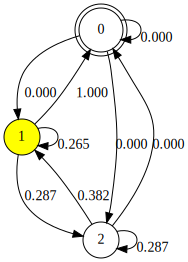

In [108]:
g = style_agraph(aset.graph.network, [1], False)
for state in sobj.indices():
    if g.has_edge(*state):
        #if sobj.local_n[state] == 0:
        #    g.remove_edge(state)
        #    pass
       # else:
            g.get_edge(*state).attr["label"] = ""
            g.get_edge(*state).attr["label"] += ("\n%.3f" % sobj.v(state))
            pass
g.layout(prog="dot")
SVG(g.draw(format="svg"))